# Exploration

- Looking for patterns

In [78]:
# Preliminary setup
import pandas as pd
import numpy as np

import datetime
import calendar

import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

In [79]:
# Import dataset from alldata.pickle
df = pd.read_pickle("alldata_clean.pickle")

In [80]:
# Useful pre-calculations
col_name = df.columns

In [81]:
# Simple stats
print(df.describe())

# Find time when sub1, sub2 and sub3 are max and min
max_value = {}
min_value = {}
for i in range(0, len(df.columns)-1):
    col = col_name[i]
    max_value[col] = df.iloc[:,i].idxmax()
    min_value[col] = df.iloc[:,i].idxmin()
    
print('Column: Timestamp of Max Value')
print(max_value)

print('Column: Timestamp of Min Value')
print(min_value)

             active      reactive         volts          amps          sub1  \
count  2.049280e+06  2.049280e+06  2.049280e+06  2.049280e+06  2.049280e+06   
mean   1.091615e+00  1.237145e-01  2.408399e+02  4.627759e+00  6.731540e-02   
std    1.057294e+00  1.127220e-01  3.239987e+00  4.444396e+00  3.691819e-01   
min    7.600000e-02  0.000000e+00  2.232000e+02  2.000000e-01  0.000000e+00   
25%    3.080000e-01  4.800000e-02  2.389900e+02  1.400000e+00  0.000000e+00   
50%    6.020000e-01  1.000000e-01  2.410100e+02  2.600000e+00  0.000000e+00   
75%    1.528000e+00  1.940000e-01  2.428900e+02  6.400000e+00  0.000000e+00   
max    1.112200e+01  1.390000e+00  2.541500e+02  4.840000e+01  5.280000e+00   

               sub2          sub3         house  
count  2.049280e+06  2.049280e+06  2.049280e+06  
mean   7.791120e-02  4.674672e-03  9.417138e-01  
std    3.493216e-01  2.095930e-02  8.293460e-01  
min    0.000000e+00  0.000000e+00 -2.700000e-01  
25%    0.000000e+00  0.000000e+00  2.7

Column: Number of Outliers
{'active': 94907, 'reactive': 1211984, 'volts': 2049280, 'amps': 0, 'sub1': 2049280, 'sub2': 1993808, 'sub3': 2049280}


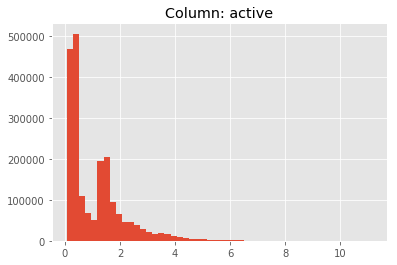

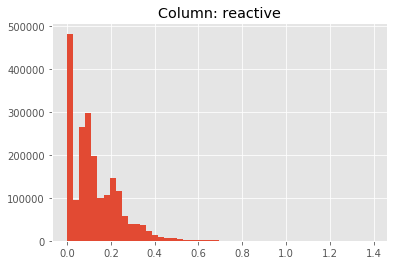

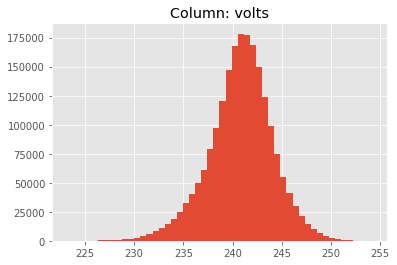

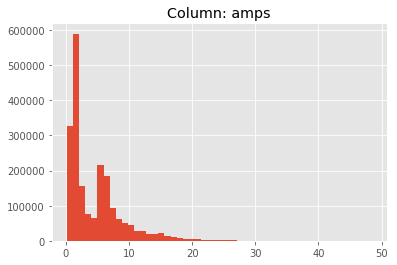

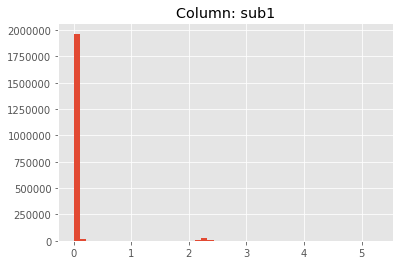

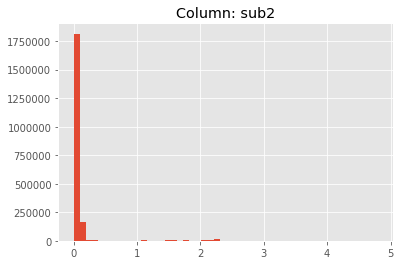

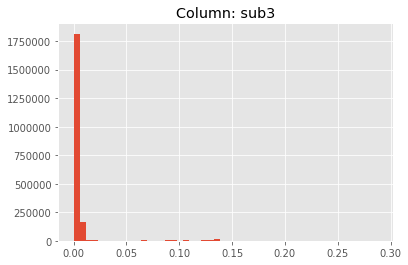

In [82]:
# Look for outliers
# NOTE - there's either tons, or none.. so I think this means there aren't specific outliers to remove from the dataset?
outliers = {}
for i in range(0, len(df.columns)-1):

    # calculate interquartile range
    q25, q75 = df.iloc[:,i].quantile(q=.25), df.iloc[:,i].quantile(q=.75)
    iqr = q75 - q25

    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    # identify outliers
    o = [x for x in df['active'] if x < lower or x > upper]
    col = col_name[i]
    outliers[col] = len(o)
    
print('Column: Number of Outliers')
print(outliers)
    
# Show histograms of each feature to look for visual outliers
for i in range(0,len(df.columns)-1):
    col = col_name[i]
    title = 'Column: ' + col
    plt.hist(df.iloc[:,i], 50)
    plt.title(title)
    plt.show()

In [83]:
# Choose a random 30-day period, for hourly averaged data
date_time = pd.to_datetime(df.index)
date_array = np.unique(date_time.date)
r = len(date_array)
n = np.random.randint(1,r)
date = date_array[n]
date_end = date_array[n+30]

# dates to strings for convenience in plotting titles
ds = date.strftime('%m/%d/%Y')
de = date_end.strftime('%m/%d/%Y')

# Filter df to only one 30-day period
mask = (pd.to_datetime(df.index).date > date) & (pd.to_datetime(df.index).date <= date_end)
df_month = df.loc[mask]

active
0.9680272939187685
reactive
0.9343932007184591
volts
0.982949043042971
amps
0.9672335264255317
sub1
0.9190459525604255
sub2
0.9354334416705972
sub3
0.9354334416705948


C:\Users\Toren\Anaconda3\lib\site-packages\matplotlib\pyplot.py:969: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


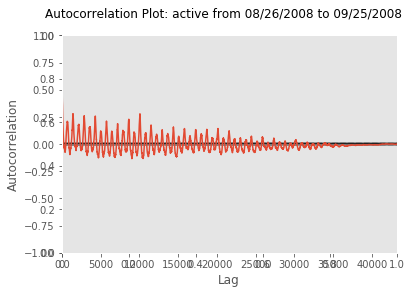

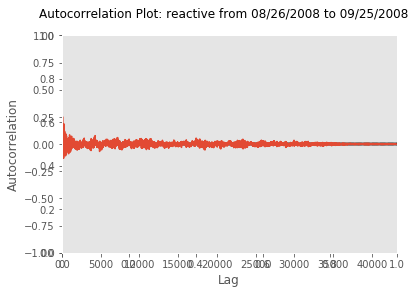

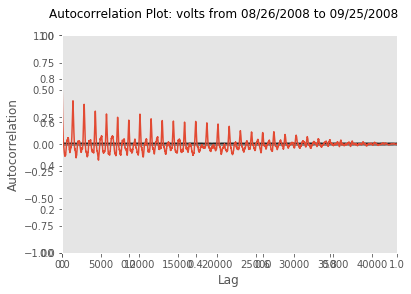

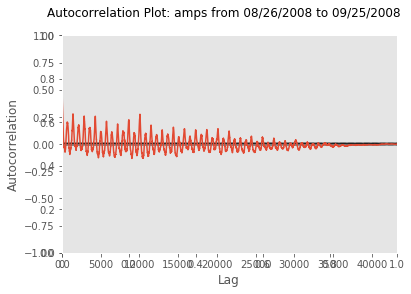

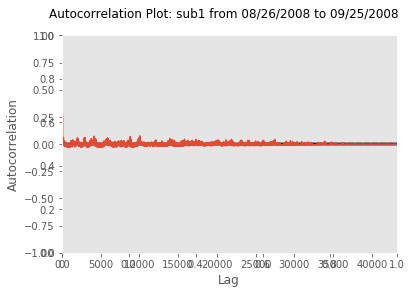

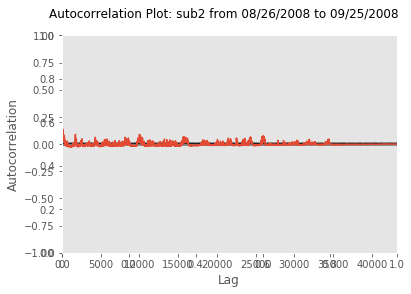

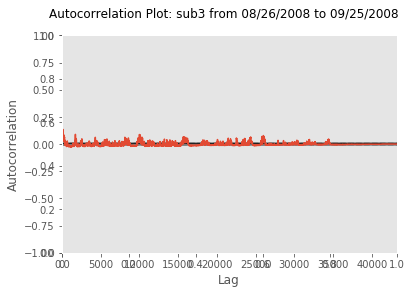

In [84]:
# Autocorrelation

# autocorrelation value for each column
for i in range(0, len(df.columns)-1):
    print(col_name[i])
    colseries = pd.Series(df.iloc[:,i])
    print(colseries.autocorr())

# autocorrelation plot
for i in range(0, len(df.columns)-1):
    colseries = pd.Series(df_month.iloc[:,i])
    col = col_name[i]
    title = 'Autocorrelation Plot: ' + col + ' from ' + ds + ' to ' + de
    
    fig = plt.figure()
    fig.suptitle(title)
    ax = plt.axes()
    autocorrelation_plot(colseries)

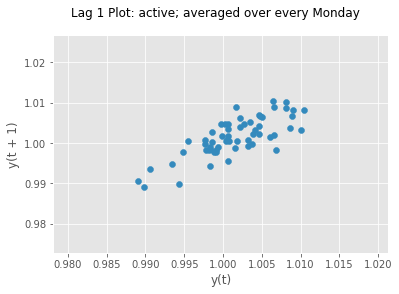

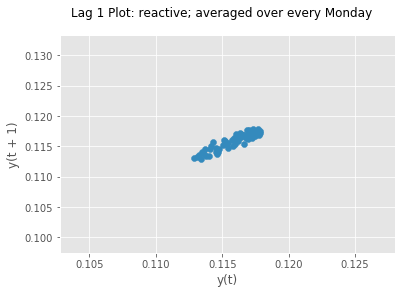

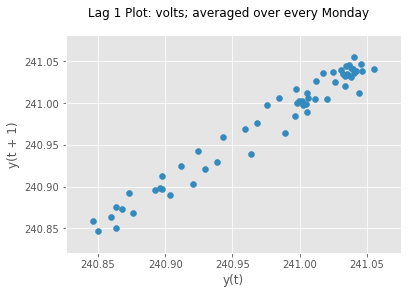

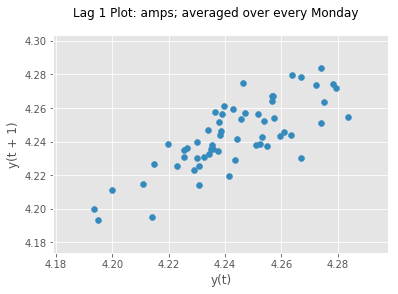

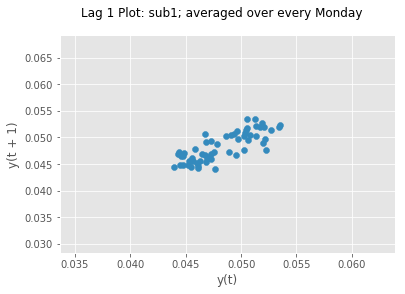

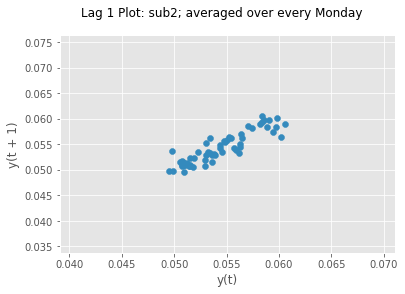

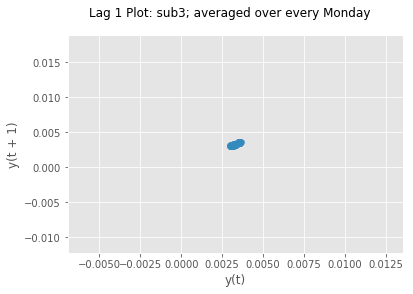

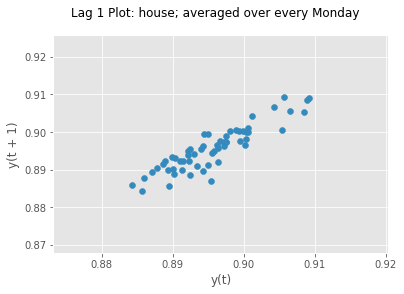

In [85]:
# LAG 1 PLOT SINGLE DAY OF WEEK

# Choose the day(Monday=0 - Sunday=6)
day = 0

# Separate this specific data into its own dataset
oneday = df.groupby(df.index.weekday==day)
o_d = oneday.get_group(True)

avg = o_d.groupby(o_d.index.minute).mean()

# Set plot style
plt.style.use('ggplot')

# Lag plot for each column
for i in range(0, len(df.columns)):
    
    col = col_name[i]
    title = 'Lag 1 Plot: ' + col + '; averaged over every ' + calendar.day_name[day]
    x = avg.iloc[:,i] # set column

    fig = plt.figure()
    fig.suptitle(title)
    ax = plt.axes()
    lag_plot(x)

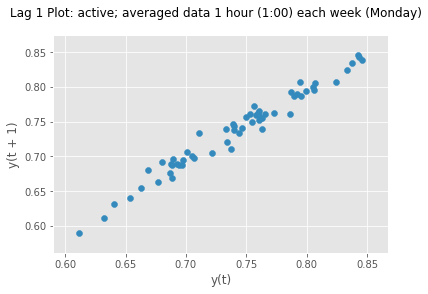

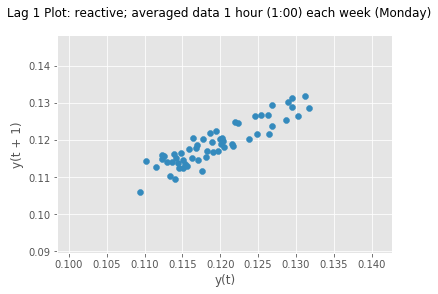

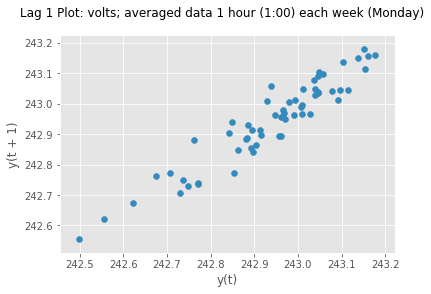

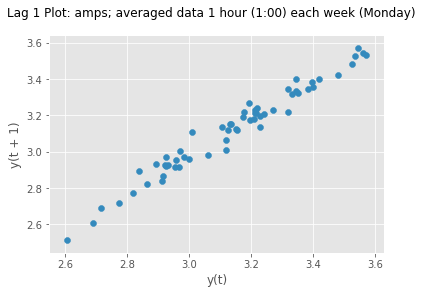

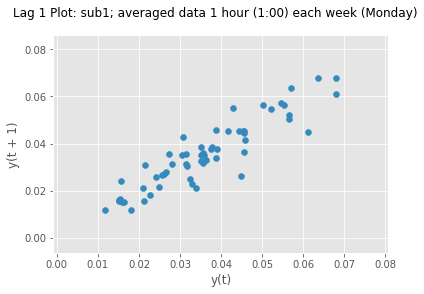

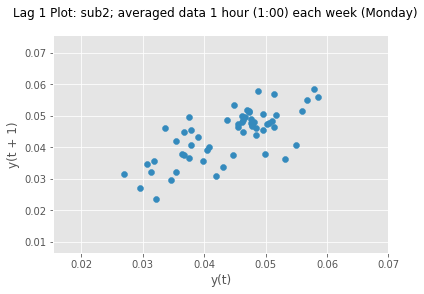

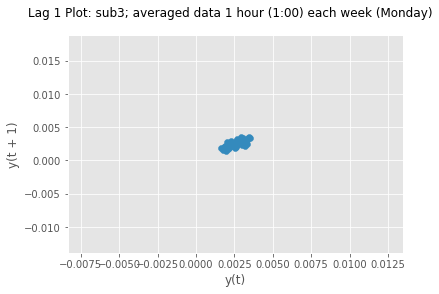

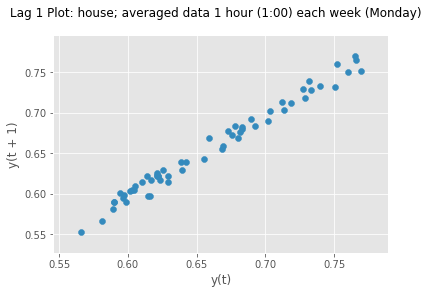

In [86]:
# LAG 1 PLOT 1HOUR EVERY WEEK

# Choose the hour(1 - 24) and day(Monday=0 - Sunday=6)
hour = 1
day = 0

# Separate this specific data into its own dataset
houralldays = df.groupby(df.index.hour==hour)
h_a_d = houralldays.get_group(True)

houreachweek = h_a_d.groupby(h_a_d.index.weekday==day)
h_e_w = houreachweek.get_group(True)

avg = h_e_w.groupby(h_e_w.index.minute).mean()

# Set plot style
plt.style.use('ggplot')

# Lag plot for each column
for i in range(0, len(df.columns)):
    
    col = col_name[i]
    title = 'Lag 1 Plot: ' + col + '; averaged data 1 hour (' + str(hour) + ':00) each week (' + calendar.day_name[day] + ')'
    x = avg.iloc[:,i] # set column

    fig = plt.figure()
    fig.suptitle(title)
    ax = plt.axes()
    lag_plot(x)

In [87]:
# # Lag Lag Plots
# from mpl_toolkits.mplot3d import Axes3D

# x = df1.iloc[:,0]

# a = pd.DataFrame({'A' : numpy.array([1] * df1.shape[0],dtype='int32'),
#                  'B' : x,
#                  'C' : x.shift(1)})

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(a['A'], a['B'], a['C'])
# #fig.suptitle(title)

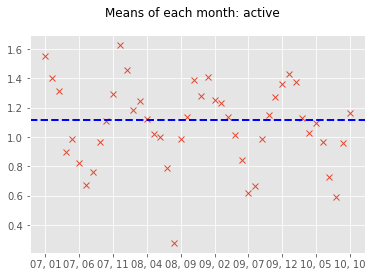

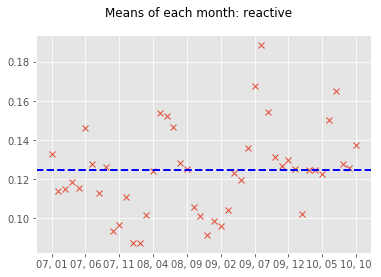

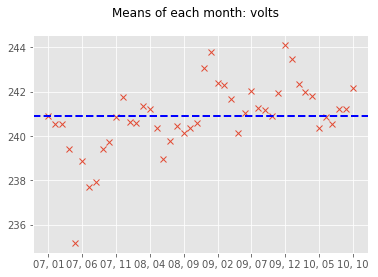

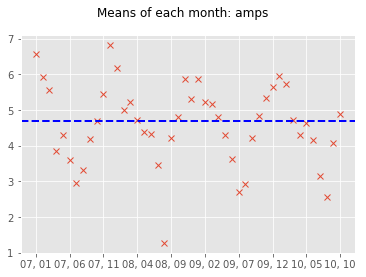

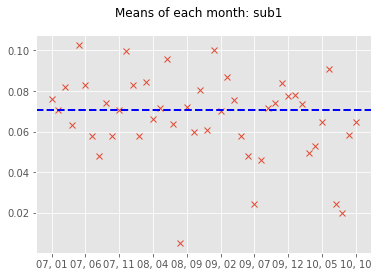

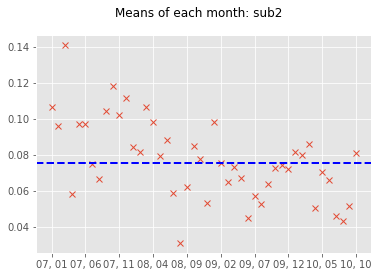

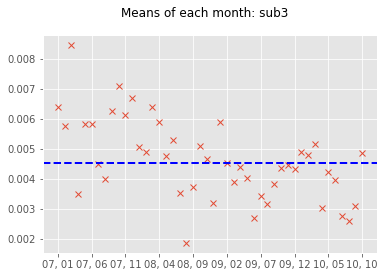

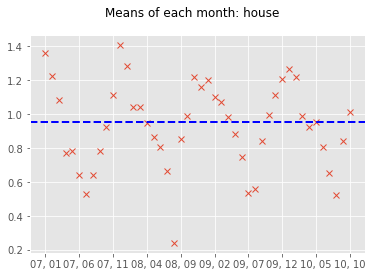

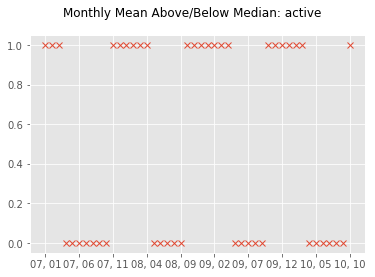

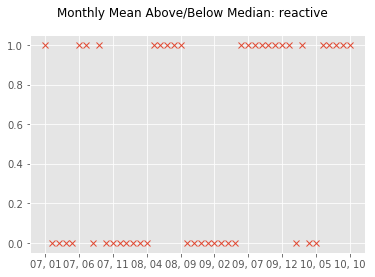

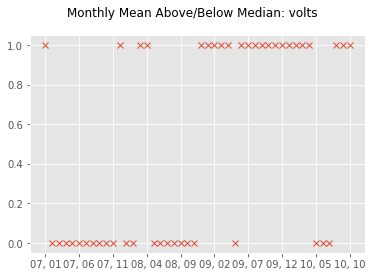

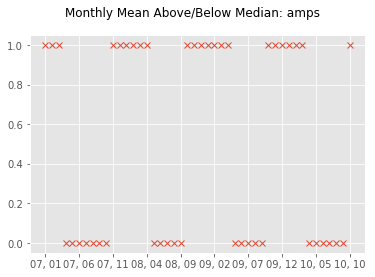

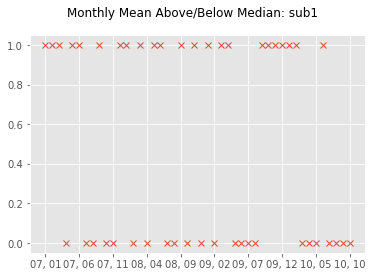

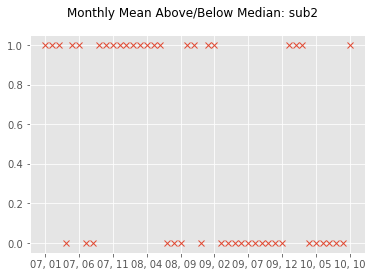

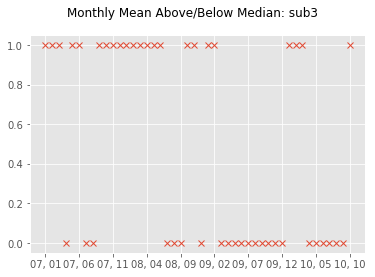

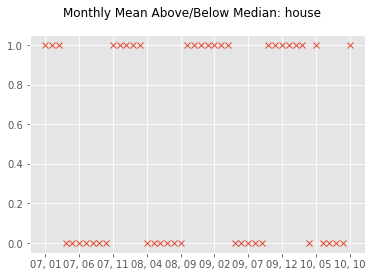

In [88]:
# Check for Stationarity/Nonstationarity using The Runs Test

#MEAN

# Split the data into time intervals of equal lengths (1 month) and calculate mean for each interval
df1 = df
df1['date'] = pd.to_datetime(df1.index).date
mn = df1.groupby(pd.to_datetime(df1['date']).dt.strftime('%y, %m')).mean()

# Remove the first and last mean, as there is not info for the full month
mn = mn.iloc[1:]
mn = mn.iloc[:-1]

# Plot the means of each interval along with the median of each series of means
col_m = mn.columns
for i in range(0, len(mn.columns)):
    col = col_m[i]
    title = 'Means of each month: ' + col
    ts = mn.iloc[:,i]
    ts_median = ts.median()
    
    fig = plt.figure()
    fig.suptitle(title)
    ax = plt.axes()
    ax.plot(ts, marker='x', linewidth=0)
    ax.axhline(y=ts_median, xmin=0, xmax=50, color='b', linestyle='--', lw=2)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    

# Count number of means above and below median
medruns = mn
for i in range(0, len(mn.columns)):
    ts = mn.iloc[:,i]
    ts_median = ts.median()
    medruns.iloc[:,i] = mn.iloc[:,i].apply(lambda x: 1 if x > ts_median else 0)
    
    col = col_m[i]
    title = 'Monthly Mean Above/Below Median: ' + col
    
    fig = plt.figure()
    fig.suptitle(title)
    ax = plt.axes()
    ax.plot(medruns.iloc[:,i], marker='x', linewidth=0)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    

# NOTE -- still need to compare to number of counts found to known probabilities of runs for random data

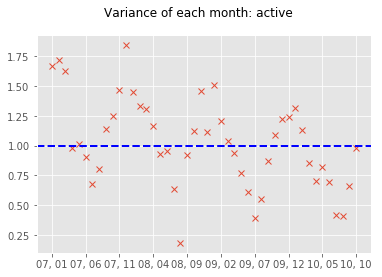

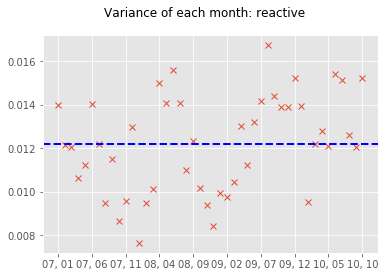

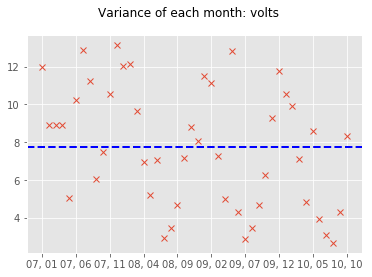

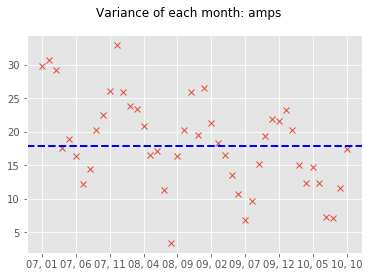

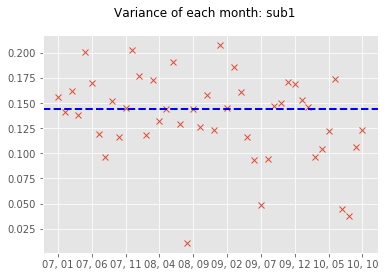

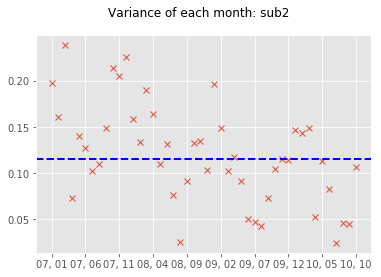

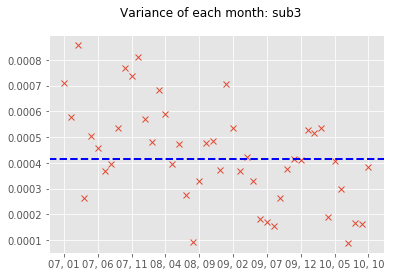

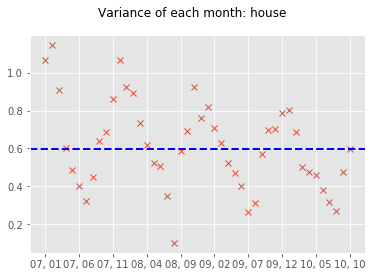

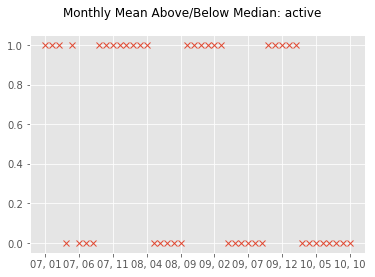

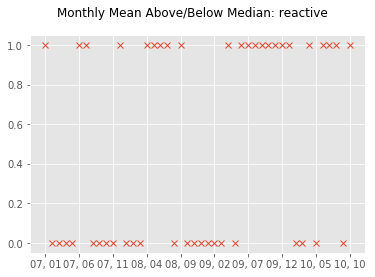

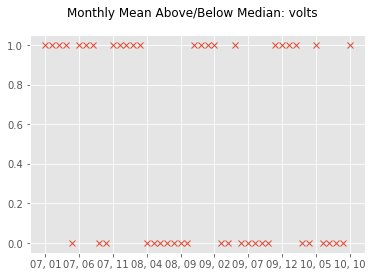

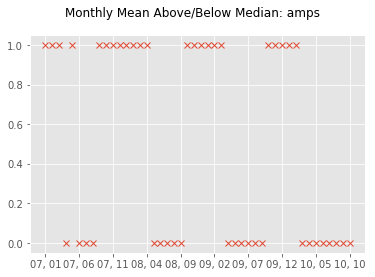

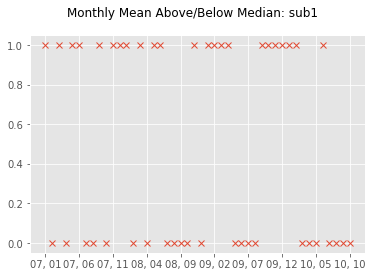

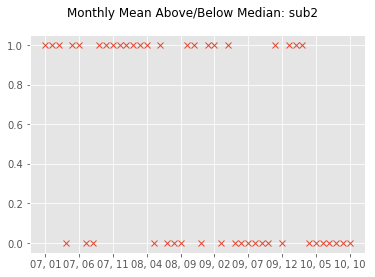

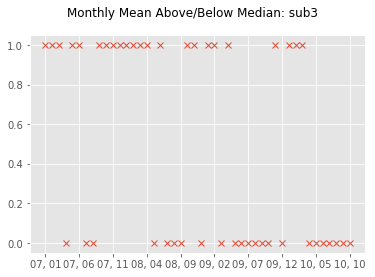

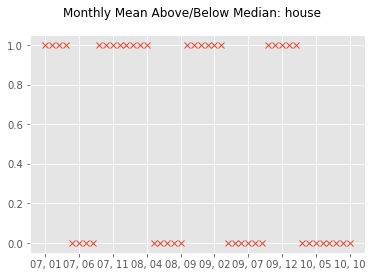

In [89]:
# Check for Stationarity/Nonstationarity using The Runs Test

#VARIANCE

# Split the data into time intervals of equal lengths (1 month) and calculate mean for each interval
df1 = df
df1['date'] = pd.to_datetime(df1.index).date
var = df1.groupby(pd.to_datetime(df1['date']).dt.strftime('%y, %m')).var()

# Remove the first and last mean, as there is not info for the full month
var = var.iloc[1:]
var = var.iloc[:-1]

# Plot the means of each interval along with the median of each series of means
col_v = var.columns
for i in range(0, len(var.columns)):
    col = col_v[i]
    title = 'Variance of each month: ' + col
    ts = var.iloc[:,i]
    ts_median = ts.median()
    
    fig = plt.figure()
    fig.suptitle(title)
    ax = plt.axes()
    ax.plot(ts, marker='x', linewidth=0)
    ax.axhline(y=ts_median, xmin=0, xmax=50, color='b', linestyle='--', lw=2)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    

# Count number of means above and below median
medruns = var
for i in range(0, len(var.columns)):
    ts = var.iloc[:,i]
    ts_median = ts.median()
    medruns.iloc[:,i] = var.iloc[:,i].apply(lambda x: 1 if x > ts_median else 0)
    
    col = col_m[i]
    title = 'Monthly Mean Above/Below Median: ' + col
    
    fig = plt.figure()
    fig.suptitle(title)
    ax = plt.axes()
    ax.plot(medruns.iloc[:,i], marker='x', linewidth=0)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    

# NOTE -- still need to compare to number of counts found to known probabilities of runs for random data